In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
pd.options.display.max_rows = 100

In [358]:
def rename_columns(df, dictionary_oldname_newname):
    print(str(dictionary_oldname_newname))
    df.rename(columns=dictionary_oldname_newname, inplace=True )
    return True

def drop_columns(df, list_column_names) :

    df.drop(columns=list_column_names, axis=1, inplace=True)
    return df

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return True

def lower_case_text_fields(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: str(x).lower())
    return True

def df_info(field, df):
    print(column + "\n")
    print(field + " nAns: " + str(len(df.loc[df[field].isnull()])) )
    if(str(df[field].dtypes)=='object'):
        print(str(df[field].value_counts()))
    print("\n")
        
def dummyfy(field, df):

    dummies = pd.get_dummies(df[field].to_frame() , columns=[field])
    return dummies.iloc[: , 1:]

def join_categories(df_categories, df_join_to):
    for column in df_categories:
        df_dummiefied = dummyfy(column, df_categories)
        df_join_to = pd.concat([df_join_to, df_dummiefied], axis=1, join="inner")
    return df_join_to
    
    

In [206]:
#get the first file

file1 = pd.read_csv('Data/file1.csv')
list(file1.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [207]:
#get the second file

file2 = pd.read_csv('Data/file2.csv')
list(file2.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Total Claim Amount',
 'Policy Type',
 'Vehicle Class']

In [208]:
#rearange the columns of file two to the order of file one

file2 = file2[file1.columns]

In [209]:
# get the third file

file3 = pd.read_csv('Data/file3.csv')
print(list(file3.columns))

['Customer', 'State', 'Customer Lifetime Value', 'Education', 'Gender', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints', 'Policy Type', 'Total Claim Amount', 'Vehicle Class']


In [210]:
# the column names are different, we have to get them in line again.

rename_columns(file3, {'State': 'ST', 'Gender' : 'GENDER'})



{'State': 'ST', 'Gender': 'GENDER'}


True

In [211]:
#and rearange the columns of file three to the order of file one


file3 = file3[file1.columns]
file3.head()


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,SA25987,Washington,M,High School or Below,3479.137523,0,104,0,Personal Auto,Two-Door Car,499.200000
1,TB86706,Arizona,M,Master,2502.637401,0,66,0,Personal Auto,Two-Door Car,3.468912
2,ZL73902,Nevada,F,Bachelor,3265.156348,25820,82,0,Personal Auto,Four-Door Car,393.600000
3,KX23516,California,F,High School or Below,4455.843406,0,121,0,Personal Auto,SUV,699.615192
4,FN77294,California,M,High School or Below,7704.958480,30366,101,2,Personal Auto,SUV,484.800000


In [212]:
#turned out this was a mistake, we don't need a fourht file
#in our concoction. But lets not delete this yet

file4 = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')
list(file4.columns)

['row',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [213]:
file4.head()
#replaced the empty clumnhead with "row" . Don't ask why row

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [214]:
# the first column was the old indicies we don't need anymore.
# to be able to adress this column I had to rename it in the source
file4.drop(columns=['row'], axis=1, inplace=True)

In [215]:
# lets put the first three files together to form on long concoction
concoction = pd.concat([file1,file2,file3], axis=0)
concoction.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [216]:
# if I'd used file4 I need to see once again how it is formed...

file4.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [217]:
# ... and then get rid of the columns not needed in the concoction

drop_columns(file4,['Coverage', 'Effective To Date', 'EmploymentStatus',  'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception','Number of Policies', 'Policy','Renew Offer Type','Sales Channel', 'Vehicle Size','Vehicle Type'])

True

In [218]:
# also reads renaming of state and gender columns to look like the others,
# the order is already correct
rename_columns(file4, {'State': 'ST', 'Gender' : 'GENDER'})

{'State': 'ST', 'Gender': 'GENDER'}


True

In [219]:
# we shouldn't use file 4 yet, but if we did

#pd.concat([concoction,file4], axis=0)

In [220]:
concoction.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [221]:
#find all the instances where the Gender column is not in the shape we want it to be

concoction[(concoction['GENDER'] != "M") & (concoction['GENDER'] != "F")].GENDER.value_counts()


Male      40
female    30
Femal     17
Name: GENDER, dtype: int64

In [222]:
concoction.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [223]:
#column names should always be lowercase in the work sheet

lower_case_column_names(concoction)

True

In [224]:
#not lets correct the wrong entries, piece by piece

concoction.loc[concoction['gender'] == "Male", "gender"]="M"
concoction.loc[concoction['gender'] == "female", "gender"]="F"
concoction.loc[concoction['gender'] == "Femal", "gender"]="F"

In [225]:
#did I overlook anything?

concoction[(concoction['gender'] != "M") & (concoction['gender'] != "F")].gender.value_counts()

Series([], Name: gender, dtype: int64)

In [226]:
# similarly control the eduction

concoction['education'] .value_counts()


Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [227]:
#only one wrong entry, let's just correct that
concoction.loc[concoction['education'] == "Bachelors", "education"]="Bachelor"

In [228]:
# now for the states
concoction['st'].value_counts()


California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [229]:
#some entries use the two character short, we need to correct those entries as well

concoction.loc[concoction['st'] == "AZ", "st"]="Arizona"
concoction.loc[concoction['st'] == "WA", "st"]="Washington"
concoction.loc[concoction['st'] == "Cali", "st"]="California"

In [230]:
# now for the states

concoction['st'].value_counts()


California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64

In [231]:
# I don't like the name of the column like this, so I change it.

rename_columns(concoction,{"st":"state"})

{'st': 'state'}


True

In [232]:
#let's take a look again

concoction.head() 

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [233]:
# ok let's check the other categorical data ...

concoction['policy type'].value_counts()

Personal Auto     6792
Corporate Auto    1965
Special Auto       380
Name: policy type, dtype: int64

In [234]:
# ... which all look fine. A well normalized source database I see.

concoction['vehicle class'].value_counts()

Four-Door Car    4641
Two-Door Car     1896
SUV              1774
Sports Car        483
Luxury SUV        182
Luxury Car        161
Name: vehicle class, dtype: int64

In [235]:
# let's controll the datatypes

concoction.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [236]:
# the number of open complaints should be a number, how does the data look

concoction['number of open complaints'].value_counts()

0         5629
1/0/00    1626
1          765
2          283
1/1/00     247
3          230
4          119
1/2/00      93
1/3/00      60
5           44
1/4/00      29
1/5/00      12
Name: number of open complaints, dtype: int64

In [237]:
#let's put another pin here

In [238]:
# there are an aweful lot of nans around
concoction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   state                      9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   education                  9137 non-null   object 
 4   customer lifetime value    9130 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly premium auto       9137 non-null   float64
 7   number of open complaints  9137 non-null   object 
 8   policy type                9137 non-null   object 
 9   vehicle class              9137 non-null   object 
 10  total claim amount         9137 non-null   float64
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [239]:
#2937 in state alone
concoction['state'].value_counts(dropna=False)

California    3152
NaN           2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [240]:
# ha! my instinct told me to wait with deleting the customer row right away, now it is useful 
# to find empty rows
concoction.loc[concoction['customer'].isnull()]

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
# pretty much all of the. Off with their head!

concoction.drop(concoction.loc[concoction['customer'].isnull()].index, inplace=True)

In [242]:
# and I was right, no more nan states

concoction.loc[concoction['state'].isnull()]

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount


In [243]:
concoction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   6200 non-null   object 
 1   state                      6200 non-null   object 
 2   gender                     6078 non-null   object 
 3   education                  6200 non-null   object 
 4   customer lifetime value    6193 non-null   object 
 5   income                     6200 non-null   float64
 6   monthly premium auto       6200 non-null   float64
 7   number of open complaints  6200 non-null   object 
 8   policy type                6200 non-null   object 
 9   vehicle class              6200 non-null   object 
 10  total claim amount         6200 non-null   float64
dtypes: float64(3), object(8)
memory usage: 581.2+ KB


In [244]:
# now I can finally delete the costumers column

concoction.drop(labels=["customer",],axis=1)

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [245]:
# still some things left, lets get rid of doulicate entries

concoction.drop_duplicates()

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [246]:
# so back to that second pin, we need to make that numeric data usable

# 1. delete percent sign

concoction['customer lifetime value'] = concoction['customer lifetime value'].apply(lambda x: str(x).split(".")[0])

In [247]:
# 2. convert to numeric
concoction['customer lifetime value'] =  pd.to_numeric(concoction['customer lifetime value'], errors='coerce')

In [248]:
concoction.head()

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [249]:
# delete useless entries where the most important entry is null
concoction.drop(concoction.loc[concoction['customer lifetime value'].isnull()].index, inplace=True)


In [250]:
concoction.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [251]:
concoction.mean()

C:\Users\Eupho\AppData\Local\Temp\ipykernel_3456\3666452946.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  concoction.mean()


customer lifetime value    264288.957760
income                      38053.027027
monthly premium auto          118.297783
total claim amount            424.910575
dtype: float64

In [252]:
concoction.mean()[1]

C:\Users\Eupho\AppData\Local\Temp\ipykernel_3456\3704236072.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  concoction.mean()[1]


38053.02702702703

In [253]:
concoction.loc[concoction['total claim amount'].isnull()]

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount


In [254]:
concoction['customer lifetime value'].value_counts(dropna=False)

2396.0      6
3230.0      6
5838.0      6
5926.0      6
3508.0      6
           ..
599442.0    1
285952.0    1
609846.0    1
556129.0    1
7524.0      1
Name: customer lifetime value, Length: 5052, dtype: int64

In [255]:
# there are an aweful lot of zero income values, we need the average without them in them
concoction['income'].value_counts(dropna=False)

0.0        1520
95697.0       7
10621.0       7
14290.0       6
61108.0       6
           ... 
51622.0       1
15616.0       1
22699.0       1
81713.0       1
21941.0       1
Name: income, Length: 3964, dtype: int64

In [256]:
print(str(concoction.mean()[1]))
# get the mean for demonstration

# and the mean without the zeroes -> very different
mean_income = concoction.loc[concoction['income'] != 0.0, "income"].mean()
print(str(mean_income))
#regarding the warning, we didn't intent to change any data yet

38053.02702702703
50467.83730414252


C:\Users\Eupho\AppData\Local\Temp\ipykernel_3456\2350931946.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(str(concoction.mean()[1]))


In [257]:
# update too the mean
concoction.loc[concoction['income'] == 0.0, "income"]=mean_income

In [258]:
# ok, finally to the strangly formated field
concoction['number of open complaints'].value_counts(dropna=False)

0         3318
1/0/00    1615
1          423
1/1/00     245
2          160
3          133
1/2/00      93
4           68
1/3/00      59
1/4/00      29
5           24
1/5/00      12
Name: number of open complaints, dtype: int64

In [259]:
# replace single digits with the a part of same pattern the complex entries show

concoction.loc[concoction['number of open complaints'] == "0", "number of open complaints"]="0/0"
concoction.loc[concoction['number of open complaints'] == "1", "number of open complaints"]="0/1"
concoction.loc[concoction['number of open complaints'] == "2", "number of open complaints"]="0/2"
concoction.loc[concoction['number of open complaints'] == "3", "number of open complaints"]="0/3"
concoction.loc[concoction['number of open complaints'] == "4", "number of open complaints"]="0/4"
concoction.loc[concoction['number of open complaints'] == "5", "number of open complaints"]="0/5"

concoction.loc[concoction['number of open complaints'] == 0, "number of open complaints"]="0/0"
concoction.loc[concoction['number of open complaints'] == 1, "number of open complaints"]="0/1"
concoction.loc[concoction['number of open complaints'] == 2, "number of open complaints"]="0/2"
concoction.loc[concoction['number of open complaints'] == 3, "number of open complaints"]="0/3"
concoction.loc[concoction['number of open complaints'] == 4, "number of open complaints"]="0/4"
concoction.loc[concoction['number of open complaints'] == 5, "number of open complaints"]="0/5"

In [260]:
concoction['number of open complaints'].value_counts(dropna=False)

0/0       3318
1/0/00    1615
0/1        423
1/1/00     245
0/2        160
0/3        133
1/2/00      93
0/4         68
1/3/00      59
1/4/00      29
0/5         24
1/5/00      12
Name: number of open complaints, dtype: int64

In [261]:
# now slit them, get the second value and write those back
concoction['number of open complaints'] = concoction['number of open complaints'].apply(lambda x: str(x).split("/")[1])

In [262]:
#looks fine
concoction['number of open complaints'].value_counts(dropna=False)


0    4933
1     668
2     253
3     192
4      97
5      36
Name: number of open complaints, dtype: int64

In [263]:
# all that is left is to change the column type to numeric, specifically int
concoction['number of open complaints'] =  pd.to_numeric(concoction['number of open complaints'], errors='coerce')

In [264]:
concoction.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints      int64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [265]:
#corporate needs me to change the values of the state in a certain way

concoction.loc[concoction['state'] == "Arizona", "state"]="Central"
concoction.loc[concoction['state'] == "Nevada", "state"]="Central"

In [266]:
concoction.loc[concoction['state'] == "California", "state"]="West"

In [267]:
concoction.loc[concoction['state'] == "Oregon", "state"]="North West"

In [268]:
concoction.loc[concoction['state'] == "Washington", "state"]="East"

In [269]:
#and change state column type to category
concoction["state"].astype("category")


1          Central
2          Central
3             West
4             East
5       North West
           ...    
7065          West
7066          West
7067          West
7068          West
7069          West
Name: state, Length: 6179, dtype: category
Categories (4, object): ['Central', 'East', 'North West', 'West']

In [270]:
concoction.head()

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1,QZ44356,Central,F,Bachelor,697953.0,50467.837304,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Central,F,Bachelor,1288743.0,48767.000000,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,West,M,Bachelor,764586.0,50467.837304,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,East,M,High School or Below,536307.0,36357.000000,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,North West,F,Bachelor,825629.0,62902.000000,69.0,0,Personal Auto,Two-Door Car,159.383042


In [271]:
#like all the other text fields (that demonstrate to have categorical data)

concoction["gender"].astype("category")
concoction["education"].astype("category")
concoction["policy type"].astype("category")
concoction["vehicle class"].astype("category")


1       Four-Door Car
2        Two-Door Car
3                 SUV
4       Four-Door Car
5        Two-Door Car
            ...      
7065    Four-Door Car
7066    Four-Door Car
7067    Four-Door Car
7068    Four-Door Car
7069     Two-Door Car
Name: vehicle class, Length: 6179, dtype: category
Categories (6, object): ['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car', 'Two-Door Car']

In [272]:
#change all the text data to lowercase

lower_case_text_fields(concoction, "gender")
lower_case_text_fields(concoction, "education")
lower_case_text_fields(concoction, "policy type")
lower_case_text_fields(concoction, "vehicle class")

# state is now of type category, so not a string and the uppercase stays


True

In [273]:
#just to be sure ... 

concoction["gender"].astype("category")
concoction["education"].astype("category")
concoction["policy type"].astype("category")
concoction["vehicle class"].astype("category")

1       four-door car
2        two-door car
3                 suv
4       four-door car
5        two-door car
            ...      
7065    four-door car
7066    four-door car
7067    four-door car
7068    four-door car
7069     two-door car
Name: vehicle class, Length: 6179, dtype: category
Categories (6, object): ['four-door car', 'luxury car', 'luxury suv', 'sports car', 'suv', 'two-door car']

In [274]:
# ...but everything is fine
concoction.dtypes


customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints      int64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [275]:
# all objects are categorical, the rest numerical


In [276]:
# and now.... drummroles ... we are finally back to the first pin
# this was the optional challenge and
# THERE IS NO DATE IN THE SOURCE DATA
# I use the "cleaned" dataset with the additional fields

file4 = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')
print(str(file4.head()))
list(file4.dtypes)

   row Customer       State  Customer Lifetime Value Response  Coverage  \
0    0  DK49336     Arizona              4809.216960       No     Basic   
1    1  KX64629  California              2228.525238       No     Basic   
2    2  LZ68649  Washington             14947.917300       No     Basic   
3    3  XL78013      Oregon             22332.439460      Yes  Extended   
4    4  QA50777      Oregon              9025.067525       No   Premium   

  Education Effective To Date EmploymentStatus Gender  ...  \
0   College           2/18/11         Employed      M  ...   
1   College           1/18/11       Unemployed      F  ...   
2  Bachelor           2/10/11         Employed      M  ...   
3   College           1/11/11         Employed      M  ...   
4  Bachelor           1/17/11    Medical Leave      F  ...   

   Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                        0.0                  9  Corporate Auto  Corporate L3   
1             

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [277]:
# taking a closer look
file4.head()

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [278]:
# and there it is.... let's get the month 
# due to the nature of the assignment a string operation to get the first char would have also worked.
# but not reliably with changing data

file4["month"] = pd.to_datetime(file4["Effective To Date"], infer_datetime_format=True).dt.month

In [279]:
file4.head()

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [280]:
# as wished, show only the data of each first quarter
file4[(file4['month'] >=1) & (file4['month'] <4)]

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [281]:
#4
# prepared clean dataset

cleaned_by_nelson =  pd.read_csv('data/Data_Marketing_Customer_Analysis_Round3.csv')

In [282]:
# Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
# (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [283]:
#taking some looks at the data frame
cleaned_by_nelson.head()

,oldindex,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [284]:
#still looking
cleaned_by_nelson.dtypes

oldindex                          int64
region                           object
customer_lifetime_value           int64
response                         object
coverage                         object
education                        object
effective_to_date                object
month                            object
employment_status                object
gender                           object
income                            int64
location_code                    object
marital_status                   object
monthly_premium_auto              int64
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
total_claim_amount                int64
vehicle_class                    object
vehicle_size                     object


In [285]:
# get only the numeric fields
cleaned_by_nelson.select_dtypes(np.number)

,oldindex,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [286]:
# like mentioned further up, the first column was renamed in the source data and can go
cleaned_by_nelson = cleaned_by_nelson.drop(labels=["oldindex",],axis=1)

In [287]:
# get all numerical colors in one dataframe
nelsons_numbers = cleaned_by_nelson.select_dtypes(np.number)

In [288]:
# and get all categorical data in another
nelsons_categories = cleaned_by_nelson.select_dtypes(object)

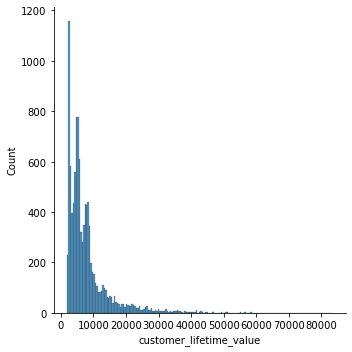

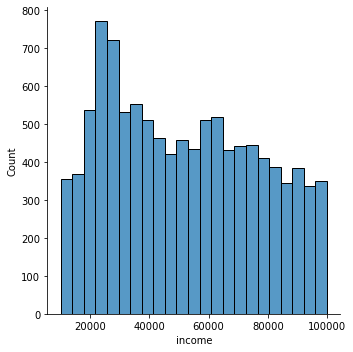

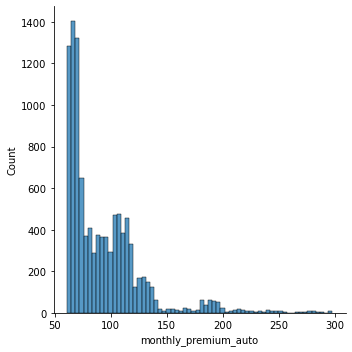

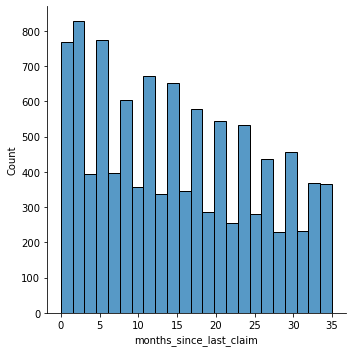

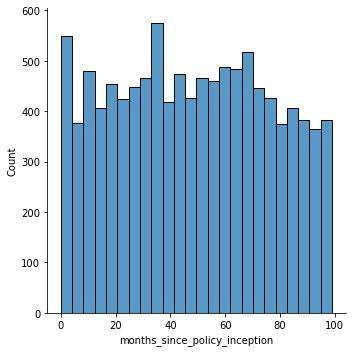

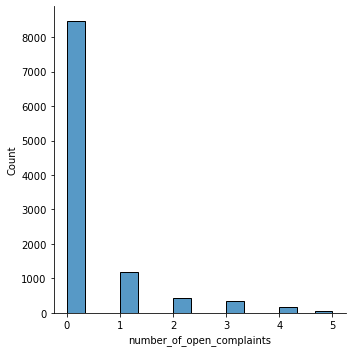

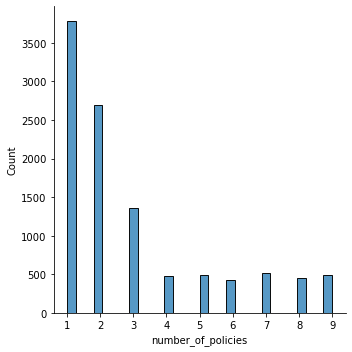

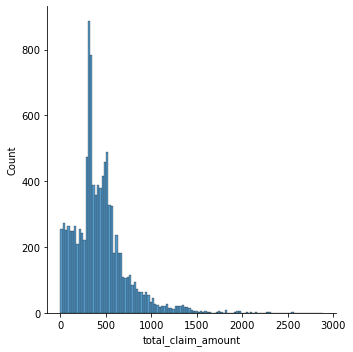

In [289]:
# show the distribution of every numeric column
for current_column in nelsons_numbers.columns:
    #print(str(current_column))
    sns.displot(nelsons_numbers[current_column])


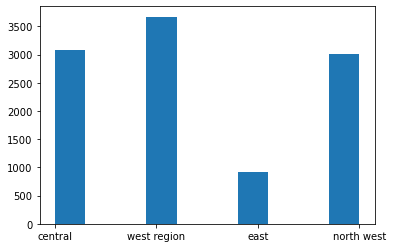

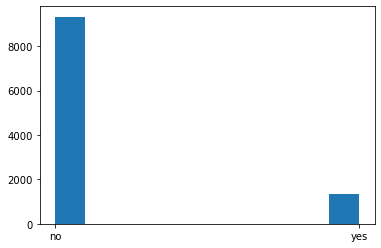

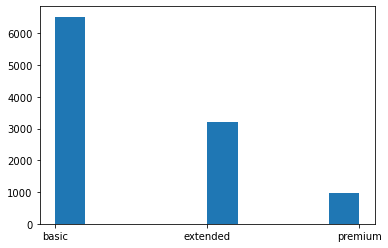

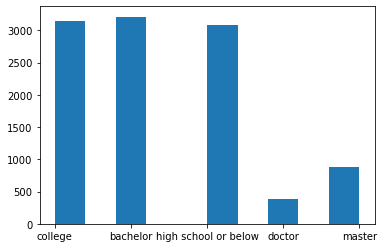

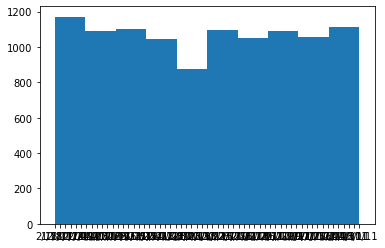

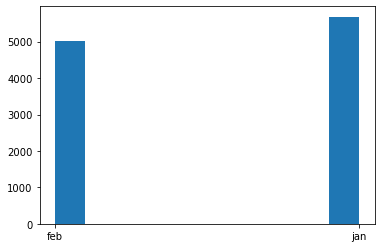

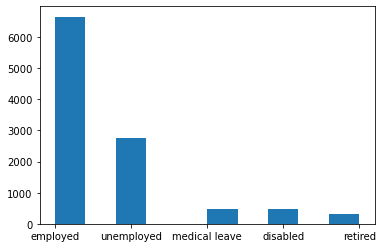

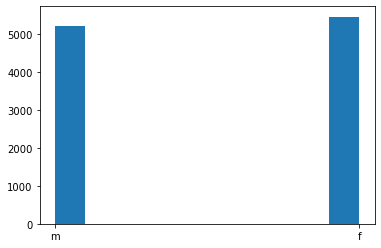

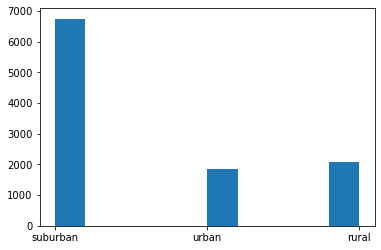

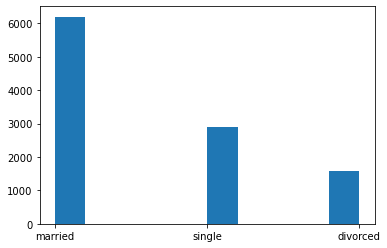

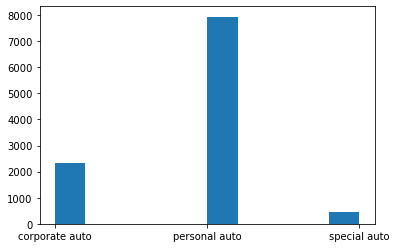

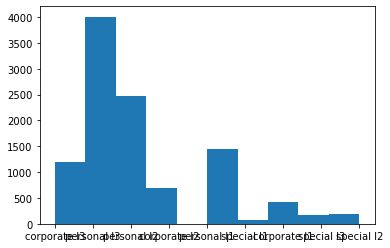

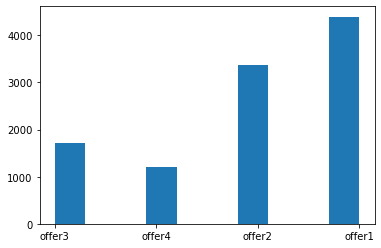

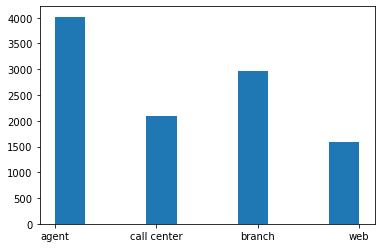

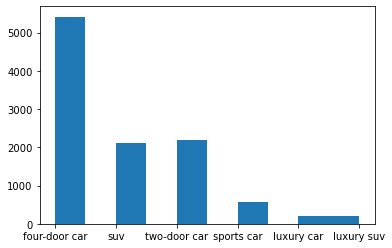

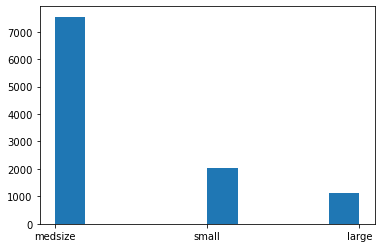

In [290]:
#show the histogram for every categorical column
for current_categorie in nelsons_categories.columns:
    plt.hist(nelsons_categories[current_categorie])
    plt.show()

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

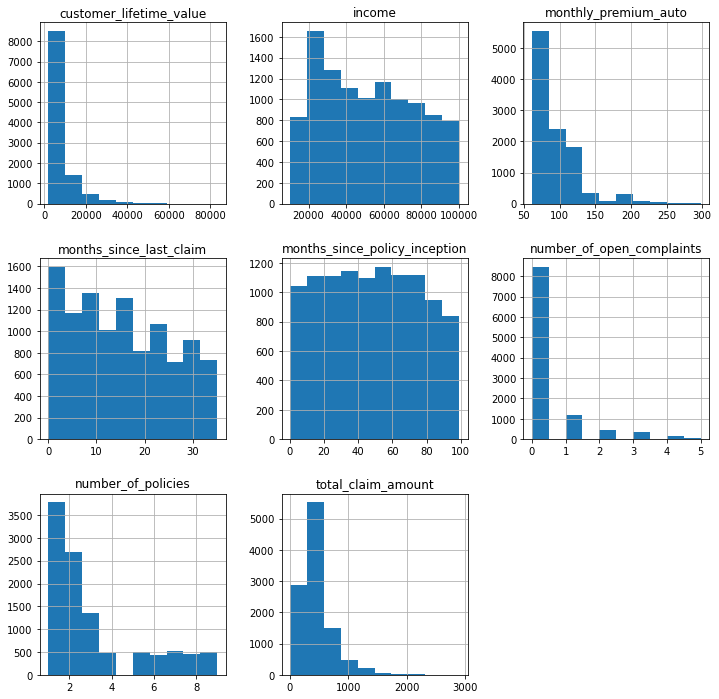

In [291]:
#another way for showing the histograms (easier on the eye)
nelsons_numbers.hist(figsize=(12,12))

In [292]:
# - Do the distributions for different numerical variables look like a normal distribution 

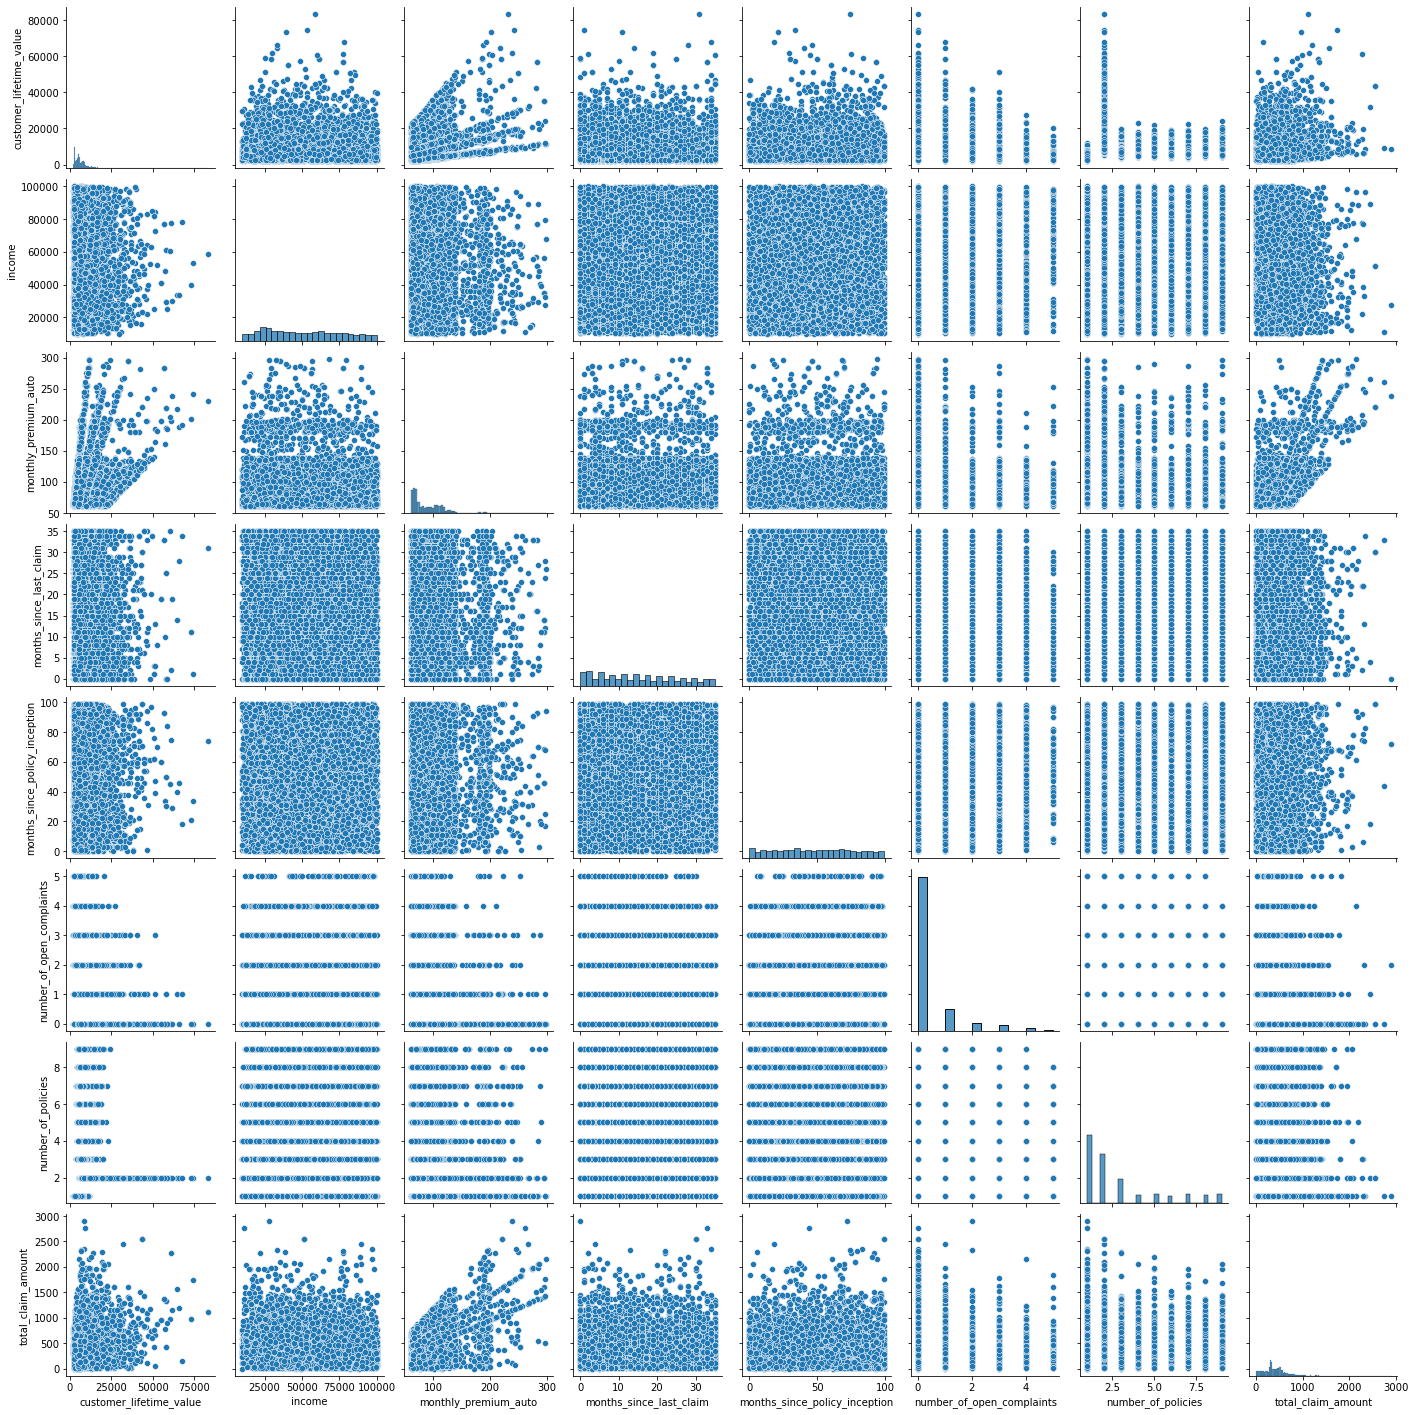

In [293]:
# No, can't find one
sns.pairplot(nelsons_numbers)

In [294]:
# there is a strong correlation between sum of claims and the monthly premium, 
# but not higher than 90.... it is just a reflection of what happens after a claim



In [295]:
#### Activity 5

# - Show a plot of the total number of responses.
# - Show a plot of the response rate by the sales channel.
# - Show a plot of the response rate by the total claim amount.
# - Show a plot of the response rate by income.
# - Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
# - Plot the Correlation Heatmap.
# - Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [296]:
# as always, take a fresh gander at the available data
nelsons_categories.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


<BarContainer object of 2 artists>

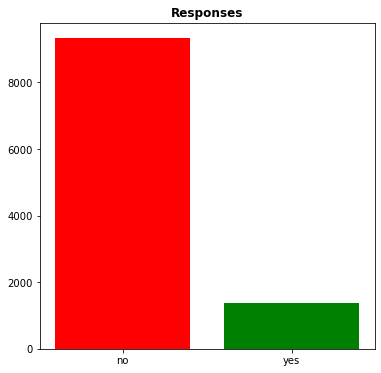

In [297]:
# the look at the responses
response = nelsons_categories['response'].value_counts()
fig3, ax3 = plt.subplots(figsize = (6,6))

# set title
ax3.set_title('Responses', fontweight='bold')

# plot the bar chart
ax3.bar(response.index, response, color=('red','green'))
#sns.barplot(nelsons_categories["response"])

In [298]:
# Show a plot of the response rate by the sales channel.

  sales_channel response  response_count
0         agent       no            3339
1         agent      yes             680
2        branch       no            2666
3        branch      yes             309
4   call center       no            1895
5   call center      yes             204
6           web       no            1428
7           web      yes             168


<AxesSubplot:xlabel='sales_channel', ylabel='response_count'>

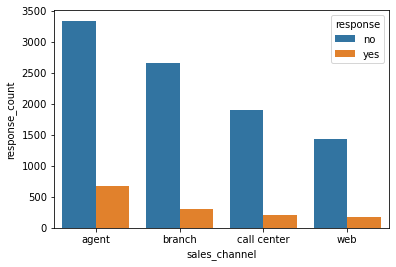

In [299]:
# prepare accordingly grouped dataset
Grouped = nelsons_categories['response'].groupby(nelsons_categories['sales_channel']).value_counts().reset_index(name ='response_count')

print(str(Grouped))
#and plot that 
sns.barplot(x='sales_channel', y='response_count', hue = 'response', data = Grouped)

In [300]:
#the concept for the nex few graphs is similar, but ...
grouped_sum = cleaned_by_nelson['response'].groupby(pd.cut(cleaned_by_nelson['total_claim_amount'], bins=[0,1,2,3,4])).count().reset_index(name ='grouped_sum')
print(grouped_sum)

  total_claim_amount  grouped_sum
0             (0, 1]            9
1             (1, 2]           12
2             (2, 3]            9
3             (3, 4]           12


<AxesSubplot:xlabel='total_claim_amount', ylabel='grouped_sum'>

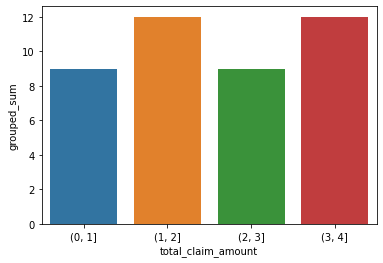

In [301]:
#... I have to use the correct bins. This are wrong and way to small
sns.barplot(x='total_claim_amount', y='grouped_sum', data = grouped_sum)

In [302]:
#after looking for the max value I did a fresh bin distribution

In [303]:
cleaned_by_nelson['total_claim_amount'].max()

2893

   total_claim_amount response  response_count
0            (0, 500]       no            6367
1            (0, 500]      yes             876
2         (500, 1000]       no            2539
3         (500, 1000]      yes             423
4        (1000, 1500]       no             333
5        (1000, 1500]      yes              60
6        (1500, 2000]       no              59
7        (1500, 2000]      yes               1
8        (2000, 2500]       no              17
9        (2000, 2500]      yes               1
10       (2500, 3000]       no               4


<AxesSubplot:xlabel='total_claim_amount', ylabel='response_count'>

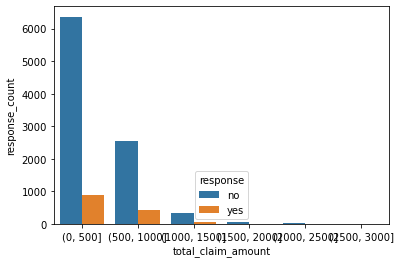

In [304]:


Grouped = cleaned_by_nelson['response'].groupby(pd.cut(cleaned_by_nelson['total_claim_amount'], bins=[0,500,1000,1500,2000,2500,3000])).value_counts().reset_index(name ='response_count')
print(str(Grouped))
sns.barplot(x='total_claim_amount', y='response_count', hue = 'response', data = Grouped)

In [305]:
#let's do it right the first time

In [306]:
cleaned_by_nelson['income'].max()

99981

In [307]:
pd.cut(cleaned_by_nelson['income'], bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])

0        (40000, 50000]
1        (20000, 30000]
2        (20000, 30000]
3        (40000, 50000]
4        (20000, 30000]
              ...      
10684    (60000, 70000]
10685    (60000, 70000]
10686    (30000, 40000]
10687    (60000, 70000]
10688    (80000, 90000]
Name: income, Length: 10689, dtype: category
Categories (10, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000] ... (60000, 70000] < (70000, 80000] < (80000, 90000] < (90000, 100000]]

             income response  response_count
0    (10000, 20000]       no             738
1    (10000, 20000]      yes             189
2    (20000, 30000]       no            1587
3    (20000, 30000]      yes             302
4    (30000, 40000]       no            1183
5    (30000, 40000]      yes             174
6    (40000, 50000]       no            1052
7    (40000, 50000]      yes              98
8    (50000, 60000]       no            1047
9    (50000, 60000]      yes             143
10   (60000, 70000]       no            1091
11   (60000, 70000]      yes             131
12   (70000, 80000]       no             964
13   (70000, 80000]      yes             143
14   (80000, 90000]       no             872
15   (80000, 90000]      yes              85
16  (90000, 100000]       no             794
17  (90000, 100000]      yes              96


<AxesSubplot:xlabel='income', ylabel='response_count'>

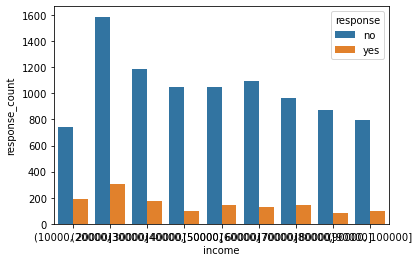

In [308]:
#ok, lets do the bin
Grouped = cleaned_by_nelson['response'].groupby(pd.cut(cleaned_by_nelson['income'], bins=[10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])).value_counts().reset_index(name ='response_count')
print(str(Grouped))
sns.barplot(x='income', y='response_count', hue = 'response', data = Grouped)

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

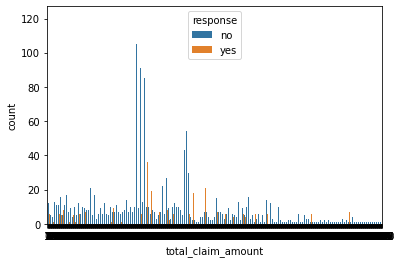

In [309]:
# after all was set and done with the bins, I learned of a supposedly easier way. Let's try it.
# no. not really much of a difference. Let's just say at least it survives
sns.countplot(x='total_claim_amount', hue = 'response', data = cleaned_by_nelson)

                 income response  response_count
0   (9947.056, 19031.4]       no             666
1   (9947.056, 19031.4]      yes             167
2    (19031.4, 28025.8]       no            1376
3    (19031.4, 28025.8]      yes             279
4    (28025.8, 37020.2]       no            1127
5    (28025.8, 37020.2]      yes             158
6    (37020.2, 46014.6]       no             999
7    (37020.2, 46014.6]      yes             113
8    (46014.6, 55009.0]       no             924
9    (46014.6, 55009.0]      yes              89
10   (55009.0, 64003.4]       no            1002
11   (55009.0, 64003.4]      yes             167
12   (64003.4, 72997.8]       no             895
13   (64003.4, 72997.8]      yes             111
14   (72997.8, 81992.2]       no             854
15   (72997.8, 81992.2]      yes             111
16   (81992.2, 90986.6]       no             783
17   (81992.2, 90986.6]      yes              71
18   (90986.6, 99981.0]       no             702
19   (90986.6, 99981

<AxesSubplot:xlabel='income', ylabel='response_count'>

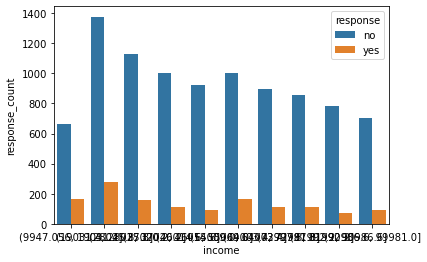

In [310]:
#but I could save with the binning

Grouped = cleaned_by_nelson['response'].groupby(pd.cut(cleaned_by_nelson['income'], bins=10)).value_counts().reset_index(name ='response_count')
print(str(Grouped))
sns.barplot(x='income', y='response_count', hue = 'response', data = Grouped)

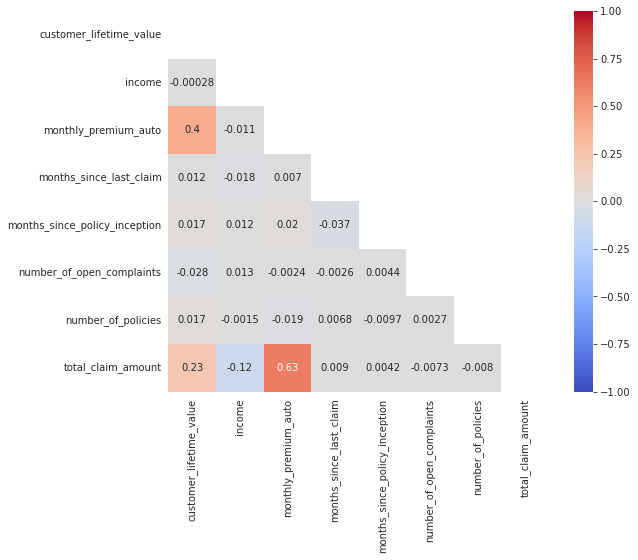

In [311]:
# I want a heatmap (just because it looks nice :P)

corr = cleaned_by_nelson.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9,7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [312]:
# a lot more eperiments are over at Daniels notebook
concoction['gender'].value_counts()

f      3121
m      2938
nan     120
Name: gender, dtype: int64

<a href="EDL_marketing_analysis_3_Daniel.ipynb">Daniels file</a>

In [313]:
np.shape(nelsons_categories)

(10689, 16)

In [314]:
dummiefied = pd.get_dummies(nelsons_categories,drop_first=True)

In [315]:
np.shape(dummiefied)

(10689, 101)

In [316]:
nelsons_numbers.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707


In [317]:
#drop_first keeps the data correct by eliminating a field that would otherwise be doubled by existense and a "hole" in the data shaped like itself

In [318]:
def remove_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [319]:
# clean outliers
nelsons_numbers['income'] =  remove_outliers(nelsons_numbers,'income')["income"]

In [320]:
# check for high correlations

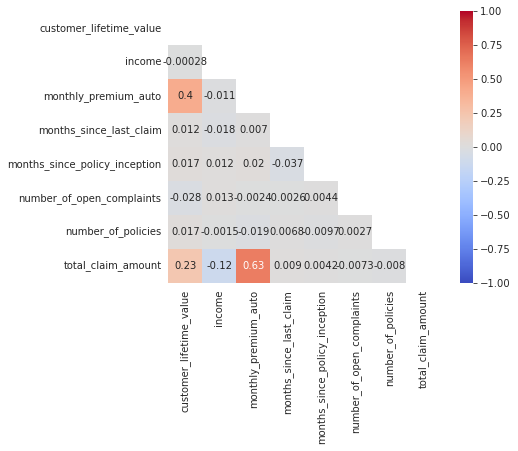

In [321]:
corr = nelsons_numbers.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [322]:
#nope, highes is .63 wait

In [323]:
Q1 = nelsons_numbers.quantile(0.25)
Q3 = nelsons_numbers.quantile(0.75)
IQR = Q3 - Q1

nelsons_numbers = nelsons_numbers[~((nelsons_numbers < (Q1 - 1.5 * IQR)) |(nelsons_numbers > (Q3 + 1.5 * IQR))).any(axis=1)]

In [324]:
# x y 

In [325]:
X=nelsons_numbers.drop('customer_lifetime_value', axis=1)
y=nelsons_numbers['customer_lifetime_value']

# Activity 7
#Linear Regression

Train-test split.
Standardize the data (after the data split).
Apply linear regression.
Model Interpretation.

In [326]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=42)

In [327]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)


In [328]:
X_test_scaled=std_scaler.transform(X_test)

In [329]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [330]:
model.coef_

array([-2.76571473e+00,  1.38477077e+03, -4.31563510e+01, -3.05950293e+01,
        1.25055521e-12,  8.33396109e+02, -1.23664817e+02])

In [331]:
model.intercept_

6069.414550072569

In [332]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [333]:
X

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,26794,64,3,26,0,1,744
2,22139,100,34,31,0,2,480
5,50549,61,2,73,0,7,292
7,87197,63,35,45,0,3,247
8,66839,154,33,24,0,1,739
...,...,...,...,...,...,...,...
10674,28334,83,3,44,0,7,537
10676,37722,116,8,23,0,8,158
10677,62447,74,9,2,0,7,133
10680,33531,116,11,15,0,1,801


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

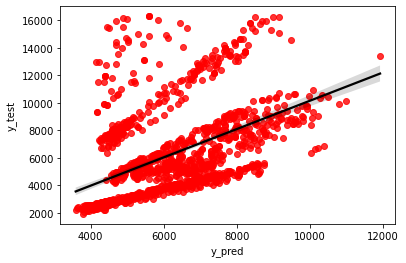

In [334]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

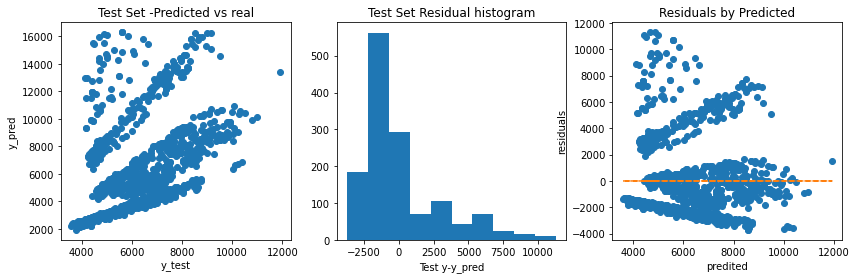

In [335]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [336]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

8302193.155366226
2159.6470454572686


In [337]:
R2=r2_score(y_test,y_pred)
R2


0.2355818574967551

In [338]:
X_test.shape[1]

7

In [339]:
X_test.head()


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1769,14390,65,16,4,0,2,402
9564,23124,112,30,59,0,1,537
2453,79407,73,2,35,0,1,490
4261,20951,105,4,98,0,6,504
10295,38025,68,2,82,0,2,326


In [340]:
X_test_scaled

array([[-1.50383125, -0.96084451,  0.08821608, ...,  0.        ,
        -0.34794548,  0.08403133],
       [-1.15512656,  1.17502141,  1.4932643 , ...,  0.        ,
        -0.82219757,  0.73095854],
       [ 1.09197055, -0.59729286, -1.31683214, ...,  0.        ,
        -0.82219757,  0.50573203],
       ...,
       [ 1.15884487, -0.59729286, -1.01575037, ...,  0.        ,
         0.60055871, -0.49580713],
       [-1.35590924, -0.77906869, -1.31683214, ...,  0.        ,
         0.12630662, -0.25620446],
       [-1.03802662, -0.55184891, -1.21647155, ...,  0.        ,
        -0.34794548,  0.6638698 ]])

In [341]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

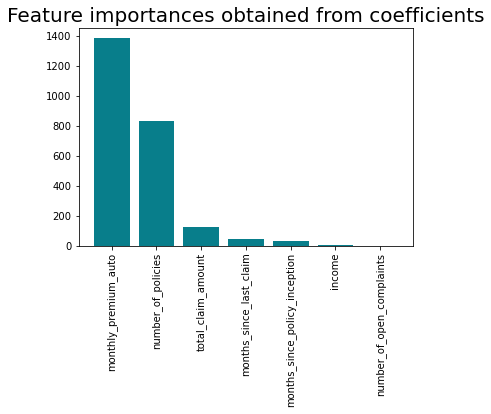

In [342]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [343]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression


In [380]:
def model_test(model,  X_train, y_train, X_test ):    
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    return model

In [345]:


def feature_drop_test(model,  X_train, y_train, X_test, number_of_features_left ):

    lm = model

    selector = RFE(lm, n_features_to_select= number_of_features_left, step = 1, verbose = 1) # Step is how many features to add or drop everytime
    selector.fit(X_train, y_train)

    kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
    kept_features = list(X_train.iloc[:,kept_features].columns)

    X_train = selector.transform(X_train)
    X_test  = selector.transform(X_test)

    X_train = pd.DataFrame(X_train, columns=kept_features)
    X_test  = pd.DataFrame(X_test, columns=kept_features)

    model_test(lm,  X_train, y_train, X_test )
    
    print("Final selected features: " + str(X_train))

    return X_train
    


In [346]:

model_test(LinearRegression(),  X_train, y_train, X_test )

LinearRegression: Train -> 0.2465717261290793, Test -> 0.23558185749675498


In [347]:

model_test(Lasso(alpha=0.05),  X_train, y_train, X_test )

Lasso: Train -> 0.24657172606812816, Test -> 0.23558179922811218


In [348]:
model_test(Ridge(alpha=10000),  X_train, y_train, X_test )

Ridge: Train -> 0.24065156339209215, Test -> 0.23084603395290526


In [349]:
print(str(len(nelsons_numbers)) + " " + str(len(nelsons_categories)))


6890 10689


In [350]:
nelsons_categories = nelsons_categories.drop(labels=['effective_to_date',],axis=1)
nelson_prepared = join_categories(nelsons_categories, nelsons_numbers)

In [351]:
nelson_prepared

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
5,4745,50549,61,2,73,0,7,292,0,1,...,0,0,0,0,0,0,0,0,1,0
7,4956,87197,63,35,45,0,3,247,0,0,...,1,0,0,0,0,0,0,1,1,0
8,5989,66839,154,33,24,0,1,739,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7,537,0,0,...,0,0,0,0,0,0,0,0,1,0
10676,9075,37722,116,8,23,0,8,158,0,0,...,0,0,0,0,0,1,0,0,1,0
10677,5807,62447,74,9,2,0,7,133,0,0,...,0,1,0,0,0,0,0,1,1,0
10680,4547,33531,116,11,15,0,1,801,1,0,...,0,0,0,0,0,0,0,1,1,0


In [352]:
for column in nelson_prepared:
    print(str(column))

customer_lifetime_value
income
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
total_claim_amount
region_east
region_north west
region_west region
response_yes
coverage_extended
coverage_premium
education_college
education_doctor
education_high school or below
education_master
month_jan
employment_status_employed
employment_status_medical leave
employment_status_retired
employment_status_unemployed
gender_m
location_code_suburban
location_code_urban
marital_status_married
marital_status_single
policy_type_personal auto
policy_type_special auto
policy_corporate l2
policy_corporate l3
policy_personal l1
policy_personal l2
policy_personal l3
policy_special l1
policy_special l2
policy_special l3
renew_offer_type_offer2
renew_offer_type_offer3
renew_offer_type_offer4
sales_channel_branch
sales_channel_call center
sales_channel_web
vehicle_class_luxury car
vehicle_class_luxury suv
vehicle_class_sports car
vehicle_class_s

In [362]:
nelson_prepared

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
5,4745,50549,61,2,73,0,7,292,0,1,...,0,0,0,0,0,0,0,0,1,0
7,4956,87197,63,35,45,0,3,247,0,0,...,1,0,0,0,0,0,0,1,1,0
8,5989,66839,154,33,24,0,1,739,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7,537,0,0,...,0,0,0,0,0,0,0,0,1,0
10676,9075,37722,116,8,23,0,8,158,0,0,...,0,0,0,0,0,1,0,0,1,0
10677,5807,62447,74,9,2,0,7,133,0,0,...,0,1,0,0,0,0,0,1,1,0
10680,4547,33531,116,11,15,0,1,801,1,0,...,0,0,0,0,0,0,0,1,1,0


In [363]:
X=nelson_prepared.drop('customer_lifetime_value', axis=1)
y=nelson_prepared['customer_lifetime_value']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=42)

# feature drop
X_train = feature_drop_test(LinearRegression(), X_train, y_train, X_test, 14)
X_train


Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

,number_of_policies,coverage_extended,coverage_premium,employment_status_employed,marital_status_single,policy_corporate l2,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_suv,vehicle_size_medsize,vehicle_size_small
0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
1,5,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,1,0,1,0,0,1,0,0,0,0,0,1,0
3,2,1,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,2,0,0,1,0,0,1,0,0,0,0,0,1,0
5508,2,0,0,0,0,0,0,0,1,0,0,0,1,0
5509,1,0,0,1,0,0,1,0,0,0,0,0,1,0
5510,6,0,0,1,1,0,0,0,0,0,0,0,1,0


In [355]:
X_train


,coverage_extended,coverage_premium,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_suv
0,1,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5507,0,0,1,0,0,0,0,0
5508,0,0,0,0,1,0,0,0
5509,0,0,1,0,0,0,0,0
5510,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

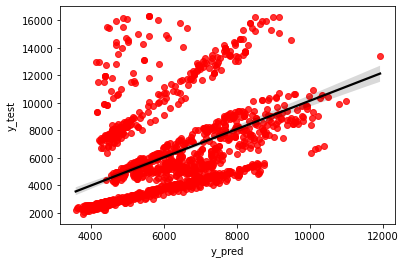

In [364]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [396]:
#let's try wirh all of them

nelson_prepared = join_categories(nelsons_categories, nelsons_numbers)

X=nelson_prepared.drop('customer_lifetime_value', axis=1)
y=nelson_prepared['customer_lifetime_value']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=42)


In [403]:
models = model_test(KNeighborsRegressor(n_neighbors=3),  X_train, y_train, X_test )

KNeighborsRegressor: Train -> 0.4921909373896396, Test -> -0.034902195564676886


# OLS

In [399]:
X_added_constant = sm.add_constant(X)
# we need to add this constant value of 1 for the intercepts
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     customer_lifetime_value   R-squared:                       0.260
Model:                                 OLS   Adj. R-squared:                  0.255
Method:                      Least Squares   F-statistic:                     51.08
Date:                     Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                             16:04:23   Log-Likelihood:                -64290.
No. Observations:                     6890   AIC:                         1.287e+05
Df Residuals:                         6842   BIC:                         1.290e+05
Df Model:                               47                                         
Covariance Type:                 nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             430.8063    417.452      1.032      0.302    -387.530    1249.142
income                              0.0004      0.002      0.243      0.808      -0.003       0.003
monthly_premium_auto               55.1205      4.381     12.581      0.000      46.532      63.709
months_since_last_claim            -6.5383      3.325     -1.966      0.049     -13.057      -0.020
months_since_policy_inception      -2.6628      1.190     -2.237      0.025      -4.996      -0.329
number_of_open_complaints        3.678e-10   3.63e-09      0.101      0.919   -6.74e-09    7.48e-09
number_of_policies                377.0320     15.833     23.813      0.000     345.995     408.070
total_claim_amount                  0.0512      0.345      0.149      0.882      -0.624       0.727
region_east                      -121.2614    129.735     -0.935      0.350    -375.583     133.060
region_north west                 119.5360     87.335      1.369      0.171     -51.668     290.740
region_west region                  5.4912     83.933      0.065      0.948    -159.044     170.027
response_yes                       86.5937    106.449      0.813      0.416    -122.079     295.266
coverage_extended                  94.1640    110.951      0.849      0.396    -123.334     311.662
coverage_premium                  350.4597    217.652      1.610      0.107     -76.206     777.126
education_college                 156.3290     86.002      1.818      0.069     -12.261     324.919
education_doctor                   41.8014    179.700      0.233      0.816    -310.466     394.069
education_high school or below    142.5631     87.823      1.623      0.105     -29.597     314.723
education_master                  235.0780    130.934      1.795      0.073     -21.593     491.749
month_jan                          34.2603     66.471      0.515      0.606     -96.044     164.564
employment_status_employed        354.6145    167.539      2.117      0.034      26.187     683.042
employment_status_medical leave   -56.9587    215.336     -0.265      0.791    -479.085     365.167
employment_status_retired         291.2684    254.444      1.145      0.252    -207.521     790.058
employment_status_unemployed      -17.9652    178.858     -0.100      0.920    -368.583     332.653
gender_m                          100.3148     66.927      1.499      0.134     -30.882     231.512
location_code_suburban           -122.8025    154.733     -0.794      0.427    -426.128     180.523
location_code_urban                30.9358    129.091      0.240      0.811    -222.123     283.994
marital_status_married             10.3847     97.857      0.106      0.915    -181.445     202.214
marital_status_single       

In [400]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()
significant_features=X_added_constant[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()]
significant_features

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employment_status_employed,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4
1,64,3,26,1,0,0,0,1
2,100,34,31,2,1,0,1,0
5,61,2,73,7,1,0,0,0
7,63,35,45,3,1,1,0,0
8,154,33,24,1,1,1,0,0
...,...,...,...,...,...,...,...,...
10674,83,3,44,7,0,0,0,0
10676,116,8,23,8,1,0,0,0
10677,74,9,2,7,1,0,0,1
10680,116,11,15,1,1,0,0,1


In [407]:
X = significant_features
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=42)

scaler = PowerTransformer()

scaler.fit(X,y)

X_train_mod = scaler.transform(X_train)
X_test_mod  = scaler.transform(X_test)
                          
model_test(LinearRegression(),  X_train, y_train, X_test )                         

LinearRegression: Train -> 0.25919470013265544, Test -> 0.23836112311365787


LinearRegression()

In [408]:
X

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employment_status_employed,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4
1,64,3,26,1,0,0,0,1
2,100,34,31,2,1,0,1,0
5,61,2,73,7,1,0,0,0
7,63,35,45,3,1,1,0,0
8,154,33,24,1,1,1,0,0
...,...,...,...,...,...,...,...,...
10674,83,3,44,7,0,0,0,0
10676,116,8,23,8,1,0,0,0
10677,74,9,2,7,1,0,0,1
10680,116,11,15,1,1,0,0,1
